In [1]:
from collections import deque


def shortest_path_faster(adj, s):
    parent = {s: None}
    d = {s: 0}
    queue = deque()
    queue.append(s)
    in_queue = {s}

    counter = {}

    while queue:
        u = queue.popleft()
        in_queue.remove(u)

        for n, weight in adj[u]:
            # have to relax the edge first, whether or not the node was in the queue
            if n not in d or d[n] > d[u] + weight: 
                d[n] = d[u] + weight
                parent[n] = u
                
                if n not in in_queue:
                    queue.append(n)
                    in_queue.add(n)
                    counter[n] = counter.get(n, 0) + 1

                    if counter[n] >= len(adj):
                        print("Negative cycle detected")
                        return

        return parent, d




### Dynamic programming approach to bellman ford:




Actually Bellman Ford is a space optimized version of 2D Dynamic Programming Solution.





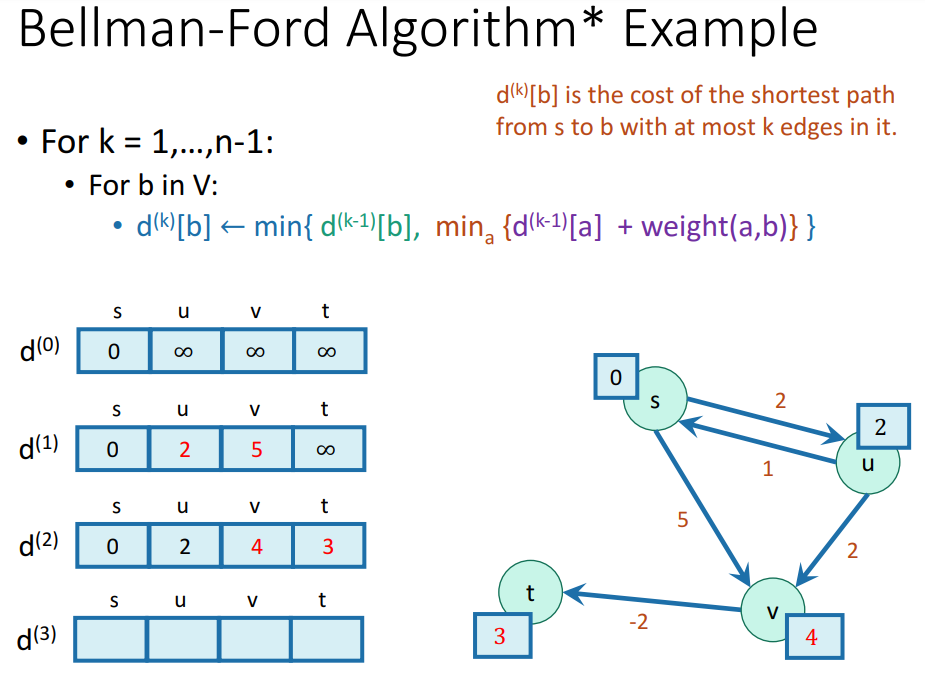




Here is the thing about bellman ford:

**After phase n, all paths of length n have been computed correctly.**


The difference between this approach and the one above is the **guarantees each phase of the algorithm gives you**

**non DP approach/the one above:**
At phase n, nodes might have distance values in them that correspond to paths of lengths more than n, (i.e. I happened to find shorter paths that spanned more edges than n during my scan in this phase, since I use new values gotten during the phase to update the other nodes on the same phase). But those I can't know 100% whether they are shortest paths until later iterations. still I don't mind having them for now. It saves me space of maintaining two parent and distance pointers.


**DP approach :**
Since at phase n, I can't vouch for the paths of lengths more than n being shortest paths or not, how about I don't compute them at all, every node will only be updated with distance values corresponding to **paths of lengths at most n**. I do that by ensuring that when relaxing edges, i only use values from the previous iteration. 

It's equivalent to running the DAG shortest path algorithm but after transforming the graph to remove cycles from it:

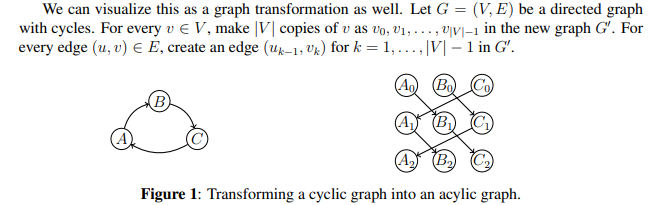

#### EXAMPLE:

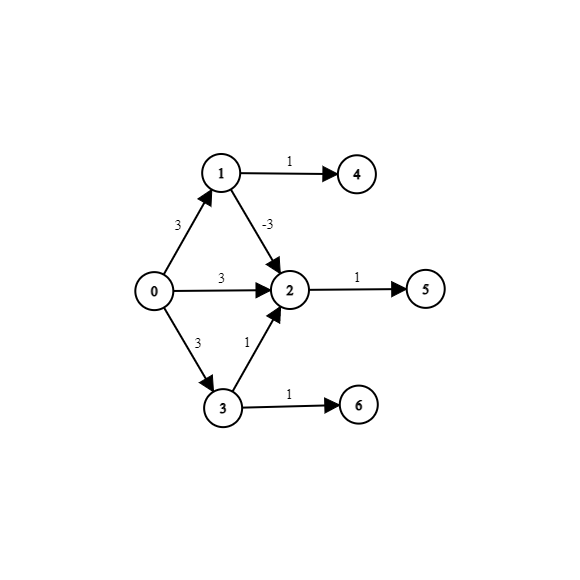


Consider the shortest paths faster algorithm. in phase 2, we scan nodes 1, 2, and 3.

**Normal Apprach:**

* scan 1: we update the values of 4 and 2.

* scan 2: we update the values of 5, using the value of 2 we have just updated. So 5 actually holds a value of a path of length 3, even though we are just in phase 2. I can't be sure this is a shortest path though, since if the path 0 -> 3 -> 2 was the shortest path, I wouldln't have known because I have updated 5 before updating 2 with that value. That's why 2 is scheduled for rescanning in the next phase regardless.

**DP Approach:**

* scan 1: we update the values of 4 and 2.

* scan 2: we update the value of 5, but not using the new value of 2, that goes through two edges, but the old value of 2. 5 will have an incorrect value, but it will have a value that exactly corresponds to a path of length 2. We would have to check it in the next iteration with the new value of 2 in both algorithms.





### Top down:

In [2]:
from math import inf



def shortest_path_at_most_k(reverse_adj, source, target, k, parent, d):

    if (k, target) in d:
        return d[(k, target)]

    # initialize current distance into d table
    d[(k, target)] = 0 if target == source else inf
    parent[(k, target)] = None

    # we can't go anywhere with 0 edges, except from the source to itself
    if k == 0:
        return d[(k, target)]

    for node, weight in reverse_adj[target]:
        if (new_dist := shortest_path_at_most_k(reverse_adj, source, node, k-1, parent, d)) + weight < d[(k, target)]:
            d[(k, target)] = new_dist
            parent[(k, target)] = node

    return d[(k, target)]


def bellman_ford(reverse_adj, source, max_path_length):
    parent = {}
    d = {}
    final_dist = {}
    for node in reverse_adj:
        final_dist[node] = shortest_path_at_most_k(reverse_adj, source, node, max_path_length, parent, d)

    final_parent = {node: parent for (k, node), parent in parent.items() if k == max_path_length}

    return final_parent, final_dist


### Bottom up:

In [1]:
def bellman_ford(edges, nodes, src, dst, max_path_length):
    
    d = {node: inf for node in nodes}
    d[src] = 0

    for _ in range(max_path_length):
        curr_d = d.copy()

        for source, target, weight in edges:
            if source not in d:
                continue

            if target not in curr_d or curr_d[target] > d[source] + weight:
                # dk[v] = min(dk[v], dk-1[u] + w)
                curr_d[target] = d[source] + weight

        d.update(curr_d)

    return d[dst]         